In [1]:
%matplotlib ipympl
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

from lsst_efd_client import EfdClient

In [2]:
efd_client = EfdClient("summit_efd")

## Time from Russell in Slack Channel

Timestamp (TAI unix seconds): 1669244241.788

In [3]:
timestamp = 1671061521.019
time_tai = Time(timestamp, format='unix_tai', scale='tai')
time_tai.format = 'fits'
print(f"TAI time: {time_tai}")

time_utc = Time(timestamp, format="unix_tai").utc.iso
print(f"UTC time: {time_utc}")

TAI time: 2022-12-14T23:45:21.019
UTC time: 2022-12-14 23:44:44.019


Based on the above, use the following time period.

In [16]:
# Short time period 
time_start = Time("2022-12-21T09:39:00", scale="utc", format="isot")
time_end = Time("2022-12-21T09:40:20", scale="utc", format="isot")

# Long time period
# time_start = Time("2022-11-30T23:38:36", scale="utc", format="isot")
# time_end = Time("2022-11-30T23:43:36", scale="utc", format="isot")

In [17]:
# EFD data
data_elevation = await efd_client.select_time_series(
        "lsst.sal.MTMount.elevation",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

data_azimuth = await efd_client.select_time_series(
        "lsst.sal.MTMount.azimuth",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

data_target = await efd_client.select_time_series(
        "lsst.sal.MTMount.logevent_target",
        fields=["elevation", "elevationVelocity", "azimuth", "azimuthVelocity", "taiTime"],
        start=time_start,
        end=time_end)

# Time period
timestamp_data_elevation = data_elevation.timestamp - data_elevation.timestamp[0]
timestamp_data_azimuth = data_azimuth.timestamp - data_azimuth.timestamp[0]

Draw the demanded position in the following.
Do not care about the weird points at this moment.

/tmp/ipykernel_808/3696213061.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


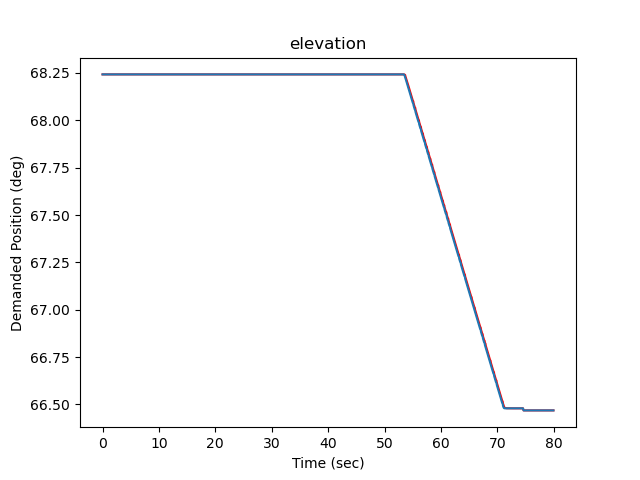

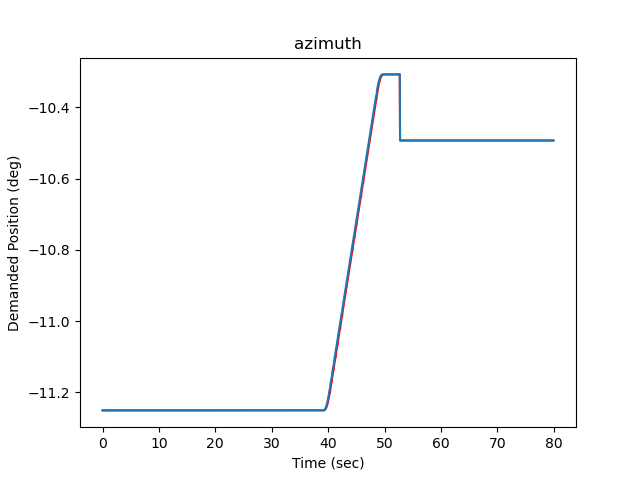

In [22]:
titles = ["elevation", "azimuth"]
timestamp_data_all = [timestamp_data_elevation, timestamp_data_azimuth]
demand_positions = [data_elevation.demandPosition, data_azimuth.demandPosition]
actualPositions = [data_elevation.actualPosition, data_azimuth.actualPosition]

for timestamp_data, demand_position, actualPosition, title in zip(timestamp_data_all, demand_positions, actualPositions, titles):
    plt.figure()
    plt.plot(timestamp_data, actualPosition, 'r-')
    plt.plot(timestamp_data, demand_position)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Position (deg)")
    plt.show()

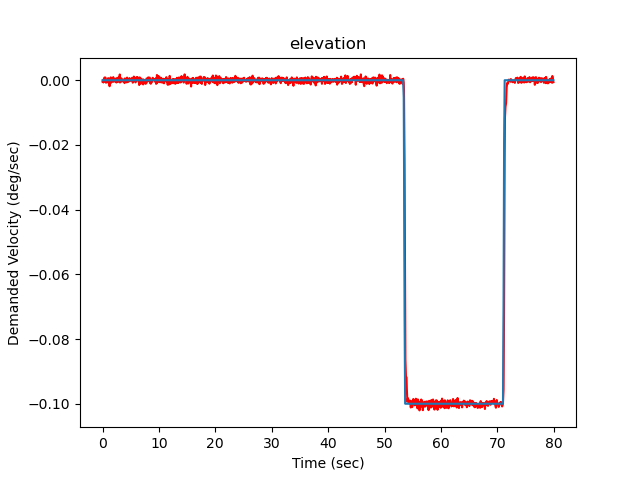

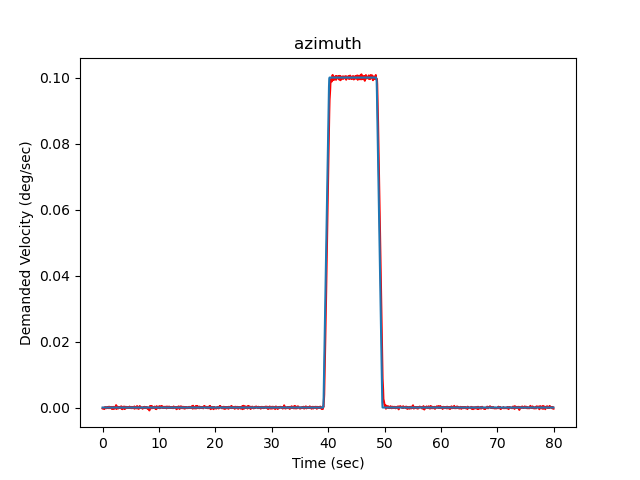

In [23]:
demand_velocities = [data_elevation.demandVelocity, data_azimuth.demandVelocity]
actual_velocities = [data_elevation.actualVelocity, data_azimuth.actualVelocity]

for timestamp_data, demand_velocity, actual_velocity, title in zip(timestamp_data_all, demand_velocities, actual_velocities, titles):
    plt.figure()
    plt.plot(timestamp_data, actual_velocity, 'r-')
    plt.plot(timestamp_data, demand_velocity)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Velocity (deg/sec)")
    plt.show()

It looks like the trajectory generator performs well if the tracking velocity is 0.1 deg/sec.
This is expected.

However, I thought that they should be 0.05 deg/sec and 0.025 deg/sec based on slack messages.

In [27]:
data_target

""


In [ ]:
type(data_target)

In [24]:
data_target.to_csv("target.csv")

In [28]:
data_elevation.to_csv("elevation_demanded_measurement.csv")

In [29]:
data_azimuth.to_csv("azimuth_demanded_measurement.csv")